<a href="https://colab.research.google.com/github/auroramugnai/Minimum-Exact-Cover-Problem/blob/main/MECP_with-QAOA/QAOA_random_parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solving the MECP with QAOA+ using "Random Parameters" technique

In [2]:
# Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# %cd /content/drive/MyDrive/ICFO_CODICI/progetto/MECP_with-QAOA
# ! pip install -r requirements.txt

## Import Modules & Define Functions

In [1]:
from __future__ import annotations
from utils_to_build_QAOAAnsatz import *

In [2]:
from datetime import datetime
import math
import random
import time

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.primitives import StatevectorEstimator, StatevectorSampler
from scipy.optimize import minimize
from pprint import pprint # to print dictionaries

In [3]:
def write_params_on_file(DATA_FILE, params):
    DATA_FILE.write("\nChosen parameters:\n")
    DATA_FILE.write(f"Number of layers (p): {params['p']}\n")
    DATA_FILE.write(f"Number of random attempts: {params['random_attempts']}\n")
    DATA_FILE.write(f"Initialization type: {params['init_string']}\n")
    DATA_FILE.write(f"Size (n): {params['n']}\n")
    DATA_FILE.write(f"Chosen instances (chosen_instances): {params['chosen_instances']}\n")
    DATA_FILE.write(f"Choices of k (chosen_ks): {params['chosen_ks']}\n")


    # Display the chosen parameters
    print(f"######### ...Writing on file...: #########")
    print("Chosen parameters:")
    print(f"Number of layers (p): {params['p']}")
    print(f"Number of random attempts: {params['random_attempts']}")
    print(f"Initialization type: {params['init_string']}")
    print(f"Size (n): {params['n']}")
    print(f"Chosen instances (chosen_instances): {params['chosen_instances']}")
    print(f"Choice of ks (chosen_ks): {params['chosen_ks']}")
    print(f"##########################################")

## Set Parameters

In [7]:
### Get parameters from the user
params = get_parameters_from_user()

# Get the parameters separately
chosen_instances = params['chosen_instances']
chosen_ks = params['chosen_ks']
p = params['p']
random_attempts = params['random_attempts']
init_string = params['init_string']

n = params['n']

Number of layers (p), default is 4:  
Number of random attempts, default is 50:  
String initialization (all1 or all0), default is all0:  
Size n (6, 8, 10), default is 6:  
Chosen instances, default is [1, ..., 10] (Give a list please!):  [1]
Choice for L, to compute k as L/(min_length * n). Give a list specifying L for every instance chosen please. [12]


## For Every Instance Chosen, Do the Minimization
This code iterates through selected instances, generating corresponding subsets and computing the spectrum of states, including Minimum Exact Cover (MEC) states. It then builds the quantum circuits for the QAOA+ algorithm, including cost, mixing, and initialization circuits. Initial angles (betas and gammas) are randomly set within specified bounds, and the QAOA+ algorithm is run for multiple random initializations to minimize energy. Results, such as the optimal parameters, best attempt, minimum energy, and elapsed time, are recorded. Final data of each instance is saved in a .csv and a .txt.



Saving in folder_path = random_parameters_2025-06-20@12h00m17s
1.0 1
**************************************************
Instance 1 with h = 1.0

U, subsets, EXACT_COVERS, MEC {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12} [{9, 6}, {9, 10, 6, 1}, {12, 5}, {10, 2, 3, 4}, {8, 1, 11, 7}, {2, 3, 4, 5, 7, 8, 11, 12}] ['010001', '101110'] ['010001']


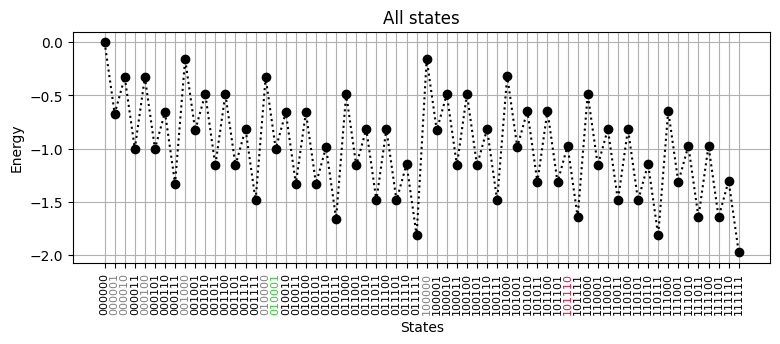

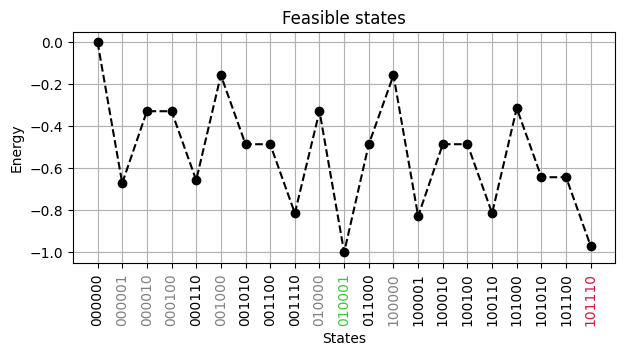

Universe: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
Subsets:
  1: {9, 6}
  2: {9, 10, 6, 1}
  3: {12, 5}
  4: {10, 2, 3, 4}
  5: {8, 1, 11, 7}
  6: {2, 3, 4, 5, 7, 8, 11, 12}
num_max_ctrl: 3
NUM_ANC: 2
QC_DIM: 8
A = 1.0285714285714285
B = 0.04285714285714286
constant = -A + B = -0.9857142857142857

hamiltonian:
 SparsePauliOp(['IIIIIIIZ', 'IIIIIIZI', 'IIIIIZII', 'IIIIZIII', 'IIIZIIII', 'IIZIIIII'],
              coeffs=[0.07857143+0.j, 0.16428571+0.j, 0.07857143+0.j, 0.16428571+0.j,
 0.16428571+0.j, 0.33571429+0.j])
Universe: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
Subsets:
  1: {9, 6}
  2: {9, 10, 6, 1}
  3: {12, 5}
  4: {10, 2, 3, 4}
  5: {8, 1, 11, 7}
  6: {2, 3, 4, 5, 7, 8, 11, 12}
num_max_ctrl: 3
NUM_ANC: 2
QC_DIM: 8
Mixing circuit created for instance 1 with 6 qubits.
Circuit dimension (QC_DIM): 8
Number of ancillas: 2
Number of control gates: 3
Universe: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
Subsets:
  1: {9, 6}
  2: {9, 10, 6, 1}
  3: {12, 5}
  4: {10, 2, 3, 4}
  5: {8, 1, 11, 

/tmp/ipykernel_265/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.73348556636965
E_min = result.fun = 0.25222871934463564

Optimal parameters: betas, gammas = [4.09470871684627, 2.1875156709378327, 2.812445007880955, 2.707527813122809], [9.995976625058432, 2.188530475756849, 9.914486201549039, -9.994071175878553]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_6of50
8   001110              281
10  010001              203
1   000001              111
11  011000               87
20  101110               56
13  100001               41
6   001010               40
4   000110               38
7   001100               37
3   000100               21
2   000010               19
17  101000               18
15  100100               15
5   001000               11
14  100010               10
19  101100                9
12  100000                8
0   000000                8
16  100110                7
18  101010                3
9   010000                1

---------- 7/50 random_attempts -----------

pars_0 = [2.6

/tmp/ipykernel_265/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.9714285714285715
E_min = result.fun = 0.014285714285714068

Optimal parameters: betas, gammas = [3.1415926427261023, 0.023658910168366708, 6.25952640675804, 2.1350179044382548e-08], [8.934823326229235, 3.6331989994557548, 1.949771657767246e-06, 9.073052321179839]
--> ***NOT UPDATING THE BEST ATTEMPT***

   states  counts_p4_7of50
0  101110             1024

---------- 8/50 random_attempts -----------

pars_0 = [4.173281583884008, 3.465090521908942, 5.263587621853016, 2.195988723670283, 3.394808412290633, -6.547342551124396, -7.988916406646499, 5.420128180033853]
bnds = [(0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307179586), (-9.995976625058432, 9.995976625058432), (-9.995976625058432, 9.995976625058432), (-9.995976625058432, 9.995976625058432), (-9.995976625058432, 9.995976625058432)]

Optimization terminated successfully.
         Current function value: 0.182000
         Iterations: 434
         Function eval

/tmp/ipykernel_265/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.9714285714285715
E_min = result.fun = 0.014285714285714124

Optimal parameters: betas, gammas = [3.1415926320579985, 2.822911883819302e-08, 1.2148189153396259e-08, 0.0], [6.840681290431637, 0.30846149875421863, -2.3676585816357134, 3.705662333918812]
--> ***NOT UPDATING THE BEST ATTEMPT***

   states  counts_p4_11of50
0  101110              1024

---------- 12/50 random_attempts -----------

pars_0 = [0.9212185333581548, 1.485449272161207, 2.3811992703897156, 2.514544009202368, 2.370898852673987, 6.495047183253199, 0.7183490561769066, -3.174263254464253]
bnds = [(0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307179586), (-9.995976625058432, 9.995976625058432), (-9.995976625058432, 9.995976625058432), (-9.995976625058432, 9.995976625058432), (-9.995976625058432, 9.995976625058432)]

Optimization terminated successfully.
         Current function value: 0.088393
         Iterations: 682
         Function evaluations:

/tmp/ipykernel_265/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7725196498833151
E_min = result.fun = 0.2131946358309705

Optimal parameters: betas, gammas = [4.509208215843611, 5.141673921237807, 3.119120164795059, 5.848352113353714], [7.286842721087398, -0.6513455049811685, -0.34821321606063793, -9.995976614338026]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_13of50
11  100001               353
14  100110               185
1   000001               124
16  101010                81
18  101110                76
17  101100                67
7   001110                66
8   010001                20
9   011000                20
3   000110                11
15  101000                 5
4   001000                 3
6   001100                 2
5   001010                 2
12  100010                 2
13  100100                 2
2   000100                 2
0   000000                 2
10  100000                 1

---------- 14/50 random_attempts -----------

pars_0 = [4.806668968543231, 2.83257097517

/tmp/ipykernel_265/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8788477400183672
E_min = result.fun = 0.10686654569591841

Optimal parameters: betas, gammas = [3.8938288384539934, 2.1511525881298272, 4.343174107854493, 3.4686450855057798], [-7.4582516904047225, 9.995976625058432, -7.323836535393719, -8.284716077320514]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_14of50
9   010001               608
12  100001               121
15  100110                93
18  101110                42
10  011000                41
3   000110                41
1   000001                28
8   010000                12
16  101000                10
6   001100                 5
0   000000                 5
7   001110                 4
14  100100                 4
11  100000                 3
4   001000                 2
13  100010                 2
5   001010                 1
2   000010                 1
17  101010                 1

---------- 15/50 random_attempts -----------

pars_0 = [0.5847995494594972, 0.59584581

/tmp/ipykernel_265/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.9714285490729617
E_min = result.fun = 0.014285736641323932

Optimal parameters: betas, gammas = [6.283038488763432, 6.28307835337071, 3.141616716286138, 0.0], [1.3611100929058029, 5.025597005740146, -2.419147426069157, 1.7600221343510123]
--> ***NOT UPDATING THE BEST ATTEMPT***

   states  counts_p4_16of50
0  101110              1024

---------- 17/50 random_attempts -----------

pars_0 = [3.203105708407954, 6.1876206839127486, 3.8208034706374088, 0.3562114097504532, -9.585278076779005, -7.54920843534525, 2.377530813004025, 2.7079901143775658]
bnds = [(0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307179586), (-9.995976625058432, 9.995976625058432), (-9.995976625058432, 9.995976625058432), (-9.995976625058432, 9.995976625058432), (-9.995976625058432, 9.995976625058432)]



/tmp/ipykernel_265/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7861260607978011
E_min = result.fun = 0.1995882249164845

Optimal parameters: betas, gammas = [2.8500503251254656, 5.69589127188558, 4.465011483860716, 1.4267623516155554], [0.2034717087554987, 7.240105798703783, -3.468374665334, 5.6077206823158]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_17of50
11  100001               396
17  101110               198
14  100110                72
1   000001                69
15  101000                60
9   010001                56
8   001110                53
4   000110                40
12  100010                29
13  100100                16
5   001000                13
10  011000                 9
3   000100                 4
0   000000                 3
7   001100                 2
16  101100                 2
6   001010                 1
2   000010                 1

---------- 18/50 random_attempts -----------

pars_0 = [1.1724168266441282, 4.874105004131682, 3.67898935713487, 5.9484650865

/tmp/ipykernel_265/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7662107799246278
E_min = result.fun = 0.2195035057896578

Optimal parameters: betas, gammas = [2.854519153076313, 4.336341656781399, 1.243098906383359, 6.075773398196315], [6.059876195914112, 0.010899542241565374, -5.243941178219366, -9.995976494029954]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_28of50
13  100001               474
1   000001               109
20  101110               104
16  100110                74
10  010001                36
17  101000                34
19  101100                30
18  101010                29
14  100010                26
4   000110                19
15  100100                19
8   001110                18
12  100000                18
6   001010                10
11  011000                 7
7   001100                 6
3   000100                 4
5   001000                 3
0   000000                 2
9   010000                 1
2   000010                 1

---------- 29/50 random_attempt

/tmp/ipykernel_265/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.6875865631261536
E_min = result.fun = 0.298127722588132

Optimal parameters: betas, gammas = [2.000500227008266, 1.5646450600568649, 6.283184446841428, 2.8224329704518247], [-5.447758294336502, 9.995975709494044, 9.99449490679342, -0.5779942352051641]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_29of50
18  101110               254
14  100110               154
8   010001               143
10  100000               111
9   011000                98
7   010000                50
12  100010                34
6   001110                32
11  100001                24
0   000000                24
3   000110                20
13  100100                18
2   000100                17
1   000010                16
17  101100                 9
5   001100                 6
4   001010                 6
15  101000                 5
16  101010                 3

---------- 30/50 random_attempts -----------

pars_0 = [0.13880744033942943, 2.093008013157

/tmp/ipykernel_265/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8927202393696865
E_min = result.fun = 0.09299404634459922

Optimal parameters: betas, gammas = [0.6224558857624777, 2.140493972867101, 1.6263847395403914, 2.4209701111636415], [-0.407439795376644, 9.995944608078766, -9.546169406718981, 2.38761145209371]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_30of50
9   010001               620
15  100110               237
12  100001                23
8   001110                22
7   001100                20
5   001000                18
6   001010                16
17  101010                15
13  100010                11
19  101110                 9
10  011000                 8
14  100100                 7
3   000100                 4
18  101100                 4
11  100000                 3
1   000001                 2
2   000010                 2
4   000110                 1
16  101000                 1
0   000000                 1

---------- 31/50 random_attempts -----------

pars_0 = [5.14

/tmp/ipykernel_265/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.882286219266833
E_min = result.fun = 0.10342806644745262

Optimal parameters: betas, gammas = [3.4568680485618737, 3.6974347017884597, 4.86487099738496, 1.287419086596751], [-8.06111010002411, 8.180979814992735, -3.3345040266065737, 9.173400408020594]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_32of50
10  010001               635
13  100001               140
16  100110                89
4   000110                55
17  101000                27
1   000001                12
0   000000                 8
5   001000                 8
12  100000                 7
14  100010                 7
3   000100                 7
2   000010                 7
8   001110                 6
15  100100                 5
7   001100                 3
9   010000                 2
6   001010                 2
18  101010                 2
11  011000                 1
19  101100                 1

---------- 33/50 random_attempts -----------

pars_0 = [5.0646

/tmp/ipykernel_265/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7958566586013082
E_min = result.fun = 0.1898576271129775

Optimal parameters: betas, gammas = [4.7450697267894615, 0.5681377826050518, 4.558698312066081, 2.3195393056847102], [9.469897901470844, 4.685853433465331, -1.7670495392379788, -9.99558895390997]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_34of50
19  101110               334
12  100001               226
15  100110               122
17  101010                65
18  101100                57
9   010001                47
1   000001                47
7   001110                39
11  100000                22
8   010000                14
14  100100                10
16  101000                 8
0   000000                 7
3   000100                 7
2   000010                 6
10  011000                 5
13  100010                 4
4   001000                 2
6   001100                 1
5   001010                 1

---------- 35/50 random_attempts -----------

pars_0 = [5.92

/tmp/ipykernel_265/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.882585960565984
E_min = result.fun = 0.10312832514830156

Optimal parameters: betas, gammas = [2.30832707193649, 4.593351731968713, 1.9924752081758799, 3.6940526314515285], [0.3825090411536225, -8.615555544018404, 9.868141473872871, -9.53122871032116]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_40of50
9   010001               639
4   000110                81
1   000001                70
15  100110                53
19  101110                45
14  100100                30
12  100001                30
13  100010                20
16  101000                16
10  011000                11
11  100000                 8
8   010000                 6
3   000100                 3
6   001010                 2
5   001000                 2
2   000010                 2
17  101010                 2
18  101100                 2
7   001110                 1
0   000000                 1

---------- 41/50 random_attempts -----------

pars_0 = [3.5544

/tmp/ipykernel_265/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8263984709710177
E_min = result.fun = 0.159315814743268

Optimal parameters: betas, gammas = [2.541085547834884, 1.5424897170357281, 5.3810473029238945, 4.649836139022979], [-2.5009800661325685, -9.576149184528234, 8.211564504101554, -3.364277345465289]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_43of50
9   010001               362
19  101110               224
1   000001                77
12  100001                72
10  011000                55
15  100110                54
7   001110                42
14  100100                30
13  100010                22
11  100000                19
2   000010                11
8   010000                10
3   000100                10
16  101000                 9
17  101010                 9
18  101100                 6
6   001100                 5
0   000000                 3
5   001010                 2
4   000110                 2

---------- 44/50 random_attempts -----------

pars_0 = [0.47

/tmp/ipykernel_265/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8330071147998416
E_min = result.fun = 0.1527071709144441

Optimal parameters: betas, gammas = [0.500800866502094, 0.7356163508243706, 0.7165064785256527, 4.232903397335068], [8.541745915810441, 9.995976625058432, -3.0495190636141514, 2.7682733928170915]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_44of50
7   010001               637
2   000110               100
0   000000                52
10  100001                52
1   000001                44
8   011000                40
5   001110                22
11  100010                20
3   001000                18
12  100100                15
13  100110                 9
9   100000                 5
14  101000                 3
6   010000                 2
15  101010                 2
4   001010                 1
16  101100                 1
17  101110                 1

---------- 45/50 random_attempts -----------

pars_0 = [5.70437623504398, 0.5717082045811681, 0.9580837650812705, 1.85

/tmp/ipykernel_265/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.971428571426054
E_min = result.fun = 0.01428571428823161

Optimal parameters: betas, gammas = [6.283182602093165, 3.14159032892895, 0.07275374152843403, 6.210431645582932], [-7.519129590655096, 1.4169407627825983, 9.69985305461893, -2.8556227042510026e-05]
--> ***NOT UPDATING THE BEST ATTEMPT***

   states  counts_p4_47of50
0  101110              1024

---------- 48/50 random_attempts -----------

pars_0 = [3.665833944663594, 6.003043548055317, 5.151870969848565, 2.6216171745534647, 2.385175468060037, -9.57833504331551, -5.173476960824087, -0.25620494786267933]
bnds = [(0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307179586), (-9.995976625058432, 9.995976625058432), (-9.995976625058432, 9.995976625058432), (-9.995976625058432, 9.995976625058432), (-9.995976625058432, 9.995976625058432)]

Optimization terminated successfully.
         Current function value: 0.014286
         Iterations: 457
         Function evalu

/tmp/ipykernel_265/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7789600098947154
E_min = result.fun = 0.20675427581957026

Optimal parameters: betas, gammas = [3.003188289672474, 4.003716184796797, 1.3179538356383258, 0.17611261106083614], [9.995976625058432, -1.5994051367403963, -5.355640607466658, -3.494996368888083]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_50of50
12  100001               468
1   000001               123
9   010001               103
19  101110                70
15  100110                45
3   000110                32
7   001110                30
18  101100                27
16  101000                23
17  101010                21
4   001000                15
5   001010                14
11  100000                13
6   001100                12
13  100010                10
10  011000                 6
14  100100                 5
0   000000                 3
8   010000                 2
2   000100                 2


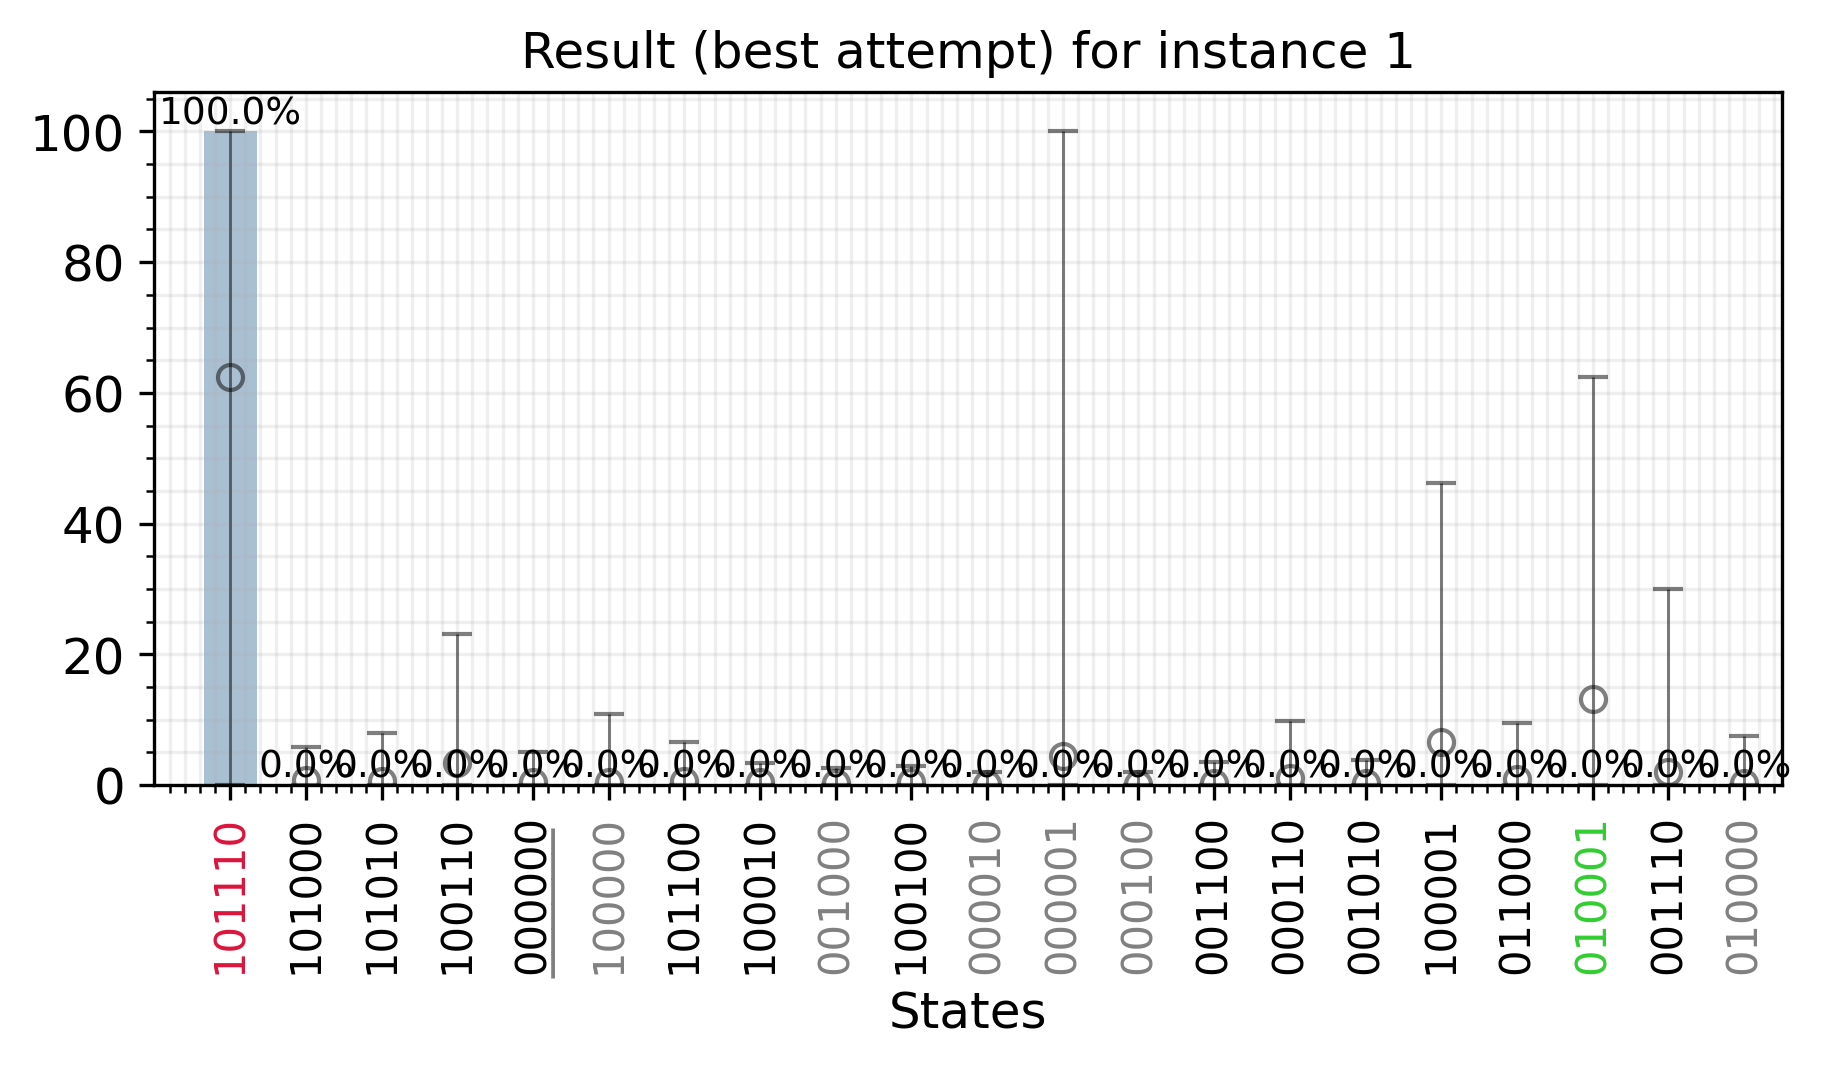

Result saved in:
random_parameters_2025-06-20@12h00m17s/dim6_mail1_all0_random_p4_50ra_k1.0_BOUNDS[0,2pi]x[-9.995976625058432,9.995976625058432]_pars0[0,2pi]x[-9.995976625058432,9.995976625058432].csv
random_parameters_2025-06-20@12h00m17s/dim6_mail1_all0_random_p4_50ra_k1.0_BOUNDS[0,2pi]x[-9.995976625058432,9.995976625058432]_pars0[0,2pi]x[-9.995976625058432,9.995976625058432]_data.txt

TOTAL ELAPSED TIME: 26.931409271558127 minutes.


In [8]:
current_datetime = datetime.now().strftime("%Y-%m-%d@%Hh%Mm%Ss")

# Create a  directory where to collect files
folder_path = f"random_parameters_{current_datetime}"
print(f"Saving in folder_path = {folder_path}")
os.makedirs(folder_path, exist_ok=True)

# Run QAOA+ for every instance.
for h, instance in zip(chosen_ks, chosen_instances):
    print(h, instance)
    print("*"*50)
    print(f"Instance {instance} with h = {h}\n")

    FILENAME_list = [] # list of .csv containing the final histograms data.
    DATA_FILENAME_list = [] # list of .txt containing metadata such as energies, betas, gammas.


    # Define the instance.
    U, subsets_dict = define_instance(n, instance, verbose=False)
    subsets = list(subsets_dict.values())
    _, _, _, _, EXACT_COVERS = find_spectrum(U, subsets_dict, n, h)
    MEC = [state for state in EXACT_COVERS if state.count("1") == min([x.count("1")  for x in EXACT_COVERS])]

    print("U, subsets, EXACT_COVERS, MEC", U, subsets, EXACT_COVERS, MEC)

    # Plot states vs energy.
    show_spectrum(n, instance, h, fontsize=10)


    # Choose the initialization.
    if init_string == 'all1':
        # Only "1"-states.
        init_name = ["".join(elem) for elem in distinct_permutations('0'*(n-1) + '1')]

    elif init_string == 'all0':
        init_name = ["000000"]


    # Prepare the cost and mixing circuit.
    constant, hamiltonian, qc_cost = build_cost_circuit(n, instance, h, verbose=True)
    qc_mixing = build_mixing_circuit(n, instance,verbose=True)
    qc_initial, check_counts  = build_initialization_circuit(n, instance, init_name, verbose=True)

    # # Check that initialization was correct.
    # plot_histogram(check_counts, ax=plt.subplots()[1], title="Initialization check", color='k')
    # plt.show(block=False) # don't stop execution


    # Set initial angles.
    gamma_bound = find_gamma_bound(n, instance, h, verbose=True)

    beta_0 = (0, 2*np.pi)
    gamma_0 =  (-gamma_bound, gamma_bound)
    string_0 = f"[0,2pi]x[-{gamma_bound},{gamma_bound}]"

    bnds_beta = (0, 2*np.pi)
    bnds_gamma = (-gamma_bound, gamma_bound)
    bnds_string = f"[0,2pi]x[-{gamma_bound},{gamma_bound}]"


    # Build files' names.
    header = f"dim{n}_mail{instance}_{init_string}" \
           + f"_random_p{p}_{random_attempts}ra_k{h}" \
           + f"_BOUNDS{bnds_string}_pars0{string_0}"

    FILENAME = os.path.join(folder_path, header + f".csv")
    DATA_FILENAME = os.path.join(folder_path, header + f"_data.txt")

    FILENAME_list.append(FILENAME)
    DATA_FILENAME_list.append(DATA_FILENAME)


    # Record the details of each attempt in a file.
    with open(DATA_FILENAME, 'a') as DATA_FILE:
        write_params_on_file(DATA_FILE, params) # Write global parameters

        E_best = 100
        TOTAL_start_time = time.time()

        for attempt in range(1,random_attempts+1):
            print(f"\n---------- {attempt}/{random_attempts} random_attempts -----------\n")
            DATA_FILE.write(f"\n---------- {attempt}/{random_attempts} random_attempts -----------\n")

            # Build QAOAAnsatz.
            cost_vs_iteration = [] # to save (and plot) iterations
            ansatz = QAOAAnsatz(qc_cost,
                                mixer_operator=qc_mixing,
                                initial_state=qc_initial,
                                reps=p, name='QAOA+')


            # Generate a pass manager without providing a backend.
            pm = generate_preset_pass_manager(optimization_level=3)
            ansatz_isa = pm.run(ansatz)
            hamiltonian_isa = hamiltonian.apply_layout(ansatz_isa.layout)

            estimator = StatevectorEstimator()
            sampler = StatevectorSampler()


            # *************************  FIND OPTIMAL ANGLES  ***************************
            # *************************     THROUGH QAOA+     ***************************

            # Set initial angles and angles'bounds.
            pars_0 = [random.uniform(*beta_0) for _ in range(p)] + \
                     [random.uniform(*gamma_0) for _ in range(p)]
            bnds = [bnds_beta]*p + [bnds_gamma]*p

            print(f"pars_0 = {pars_0}")
            print(f"bnds = {bnds}\n")


            # Do the minimization.
            result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations
                              pars_0, bounds=bnds,
                              args=(ansatz_isa, hamiltonian_isa, estimator),
                              method="Nelder-Mead",
                              options={"disp": True, "maxiter": 1200, "maxfev": 1200}, tol=1e-4)


            # Works only if you chose cost_func_plot.
            if cost_vs_iteration != []:
                plt.figure()
                plt.plot(cost_vs_iteration)
                plt.xlabel("Iteration")
                plt.ylabel("Cost")
                plt.show()


            # Minimum energy reached with minimization.
            E_min = result.fun + constant
            print(f"E_min = result.fun + constant = {E_min}")
            print(f"E_min = result.fun = {result.fun}")
            DATA_FILE.write(f"\nE_min = {E_min}")


            # Optimal parameters (betas, gammas) found.
            betas = list(result.x[:p])
            gammas = list(result.x[p:])
            print(f"\nOptimal parameters: betas, gammas = {betas}, {gammas}")
            DATA_FILE.write(f'\nE_min\'s parameters: betas = {betas}, gammas = {gammas}\n')


            # Update the best attempt.
            if E_min < E_best:
                    E_best = E_min
                    best_attempt = attempt
                    print("--> ***UPDATING THE BEST ATTEMPT***\n")
            else:
                print("--> ***NOT UPDATING THE BEST ATTEMPT***\n")


            # ****************************  RUN THE CIRCUIT  ******************************
            # ************************ WITH OPTIMAL PARAMETERS ****************************

            # Assign to the previously created ansatz the 2p parameters found.
            pars = betas + gammas
            qc = ansatz.assign_parameters(pars)
            qc.measure_all() # add a measurement

            # Run this circuit.
            qc_isa = pm.run(qc)
            output = sampler.run([qc_isa], shots=1024).result()
            samp_dist = output[0].data.meas.get_counts()


            # ****************************  POST PROCESS  **********************************
            # *********************** AND SAVE THE OUTPUT HISTOGRAM ************************

            # Create a dataframe from the sampling results.
            df = pd.DataFrame(samp_dist.items(), columns=['states', 'counts'])

            # Remove ancillary bits.
            num_ancillas = get_circuit_parameters(subsets, verbose=False)[2]
            df['states'] = df['states'].apply(lambda x: x[num_ancillas:])

            # Invert the bit order for the states (e.g., convert "01101" to "10110").
            df['states'] = df['states'].apply(lambda s: str(s)[::-1])  # Invertiamo l'ordine dei bit

            # After removing the ancillary bits, we aggregate counts by state.
            df = df.groupby(['states']).sum().reset_index()

            # Sort in decreasing order.
            df = df.sort_values('counts', ascending=False)

            # Rename the "counts" column to include attempt details.
            df.columns = ['states', f'counts_p{p}_{attempt}of{random_attempts}']

            # Merge the current attempt dataframe with previously built dataframes.
            if attempt == 1:
                df_all_attempts = df
            else:
                df_all_attempts = pd.merge(df_all_attempts, df, on="states", how="outer")
            
            print(df)


        # Save to .csv the global dataframe.
        df_all_attempts.to_csv(FILENAME, index=False)


        # Plot the best attempt (minimum energy), with error bars
        # representing other attempts in the global dataframe.
        plot_histogram_of_best_column(df_all_attempts,
                                      f'counts_p{p}_{best_attempt}of{random_attempts}',
                                      EXACT_COVERS, init_name,
                                      fontsize=12, title=f"Result (best attempt) for instance {instance}")


        DATA_FILE.write("\n*******************************")
        DATA_FILE.write(f"\nAttempt that reached the best result with E_min = {E_best} is #{best_attempt} ")
        DATA_FILE.write(f"\nTOTAL ELAPSED TIME: {(time.time() - TOTAL_start_time)/60} minutes.\n")
        print(f"Result saved in:\n{FILENAME}\n{DATA_FILENAME}")
        print(f"\nTOTAL ELAPSED TIME: {(time.time() - TOTAL_start_time)/60} minutes.")

## (Optional) Draw the latest instance QAOA circuit

Instance #4


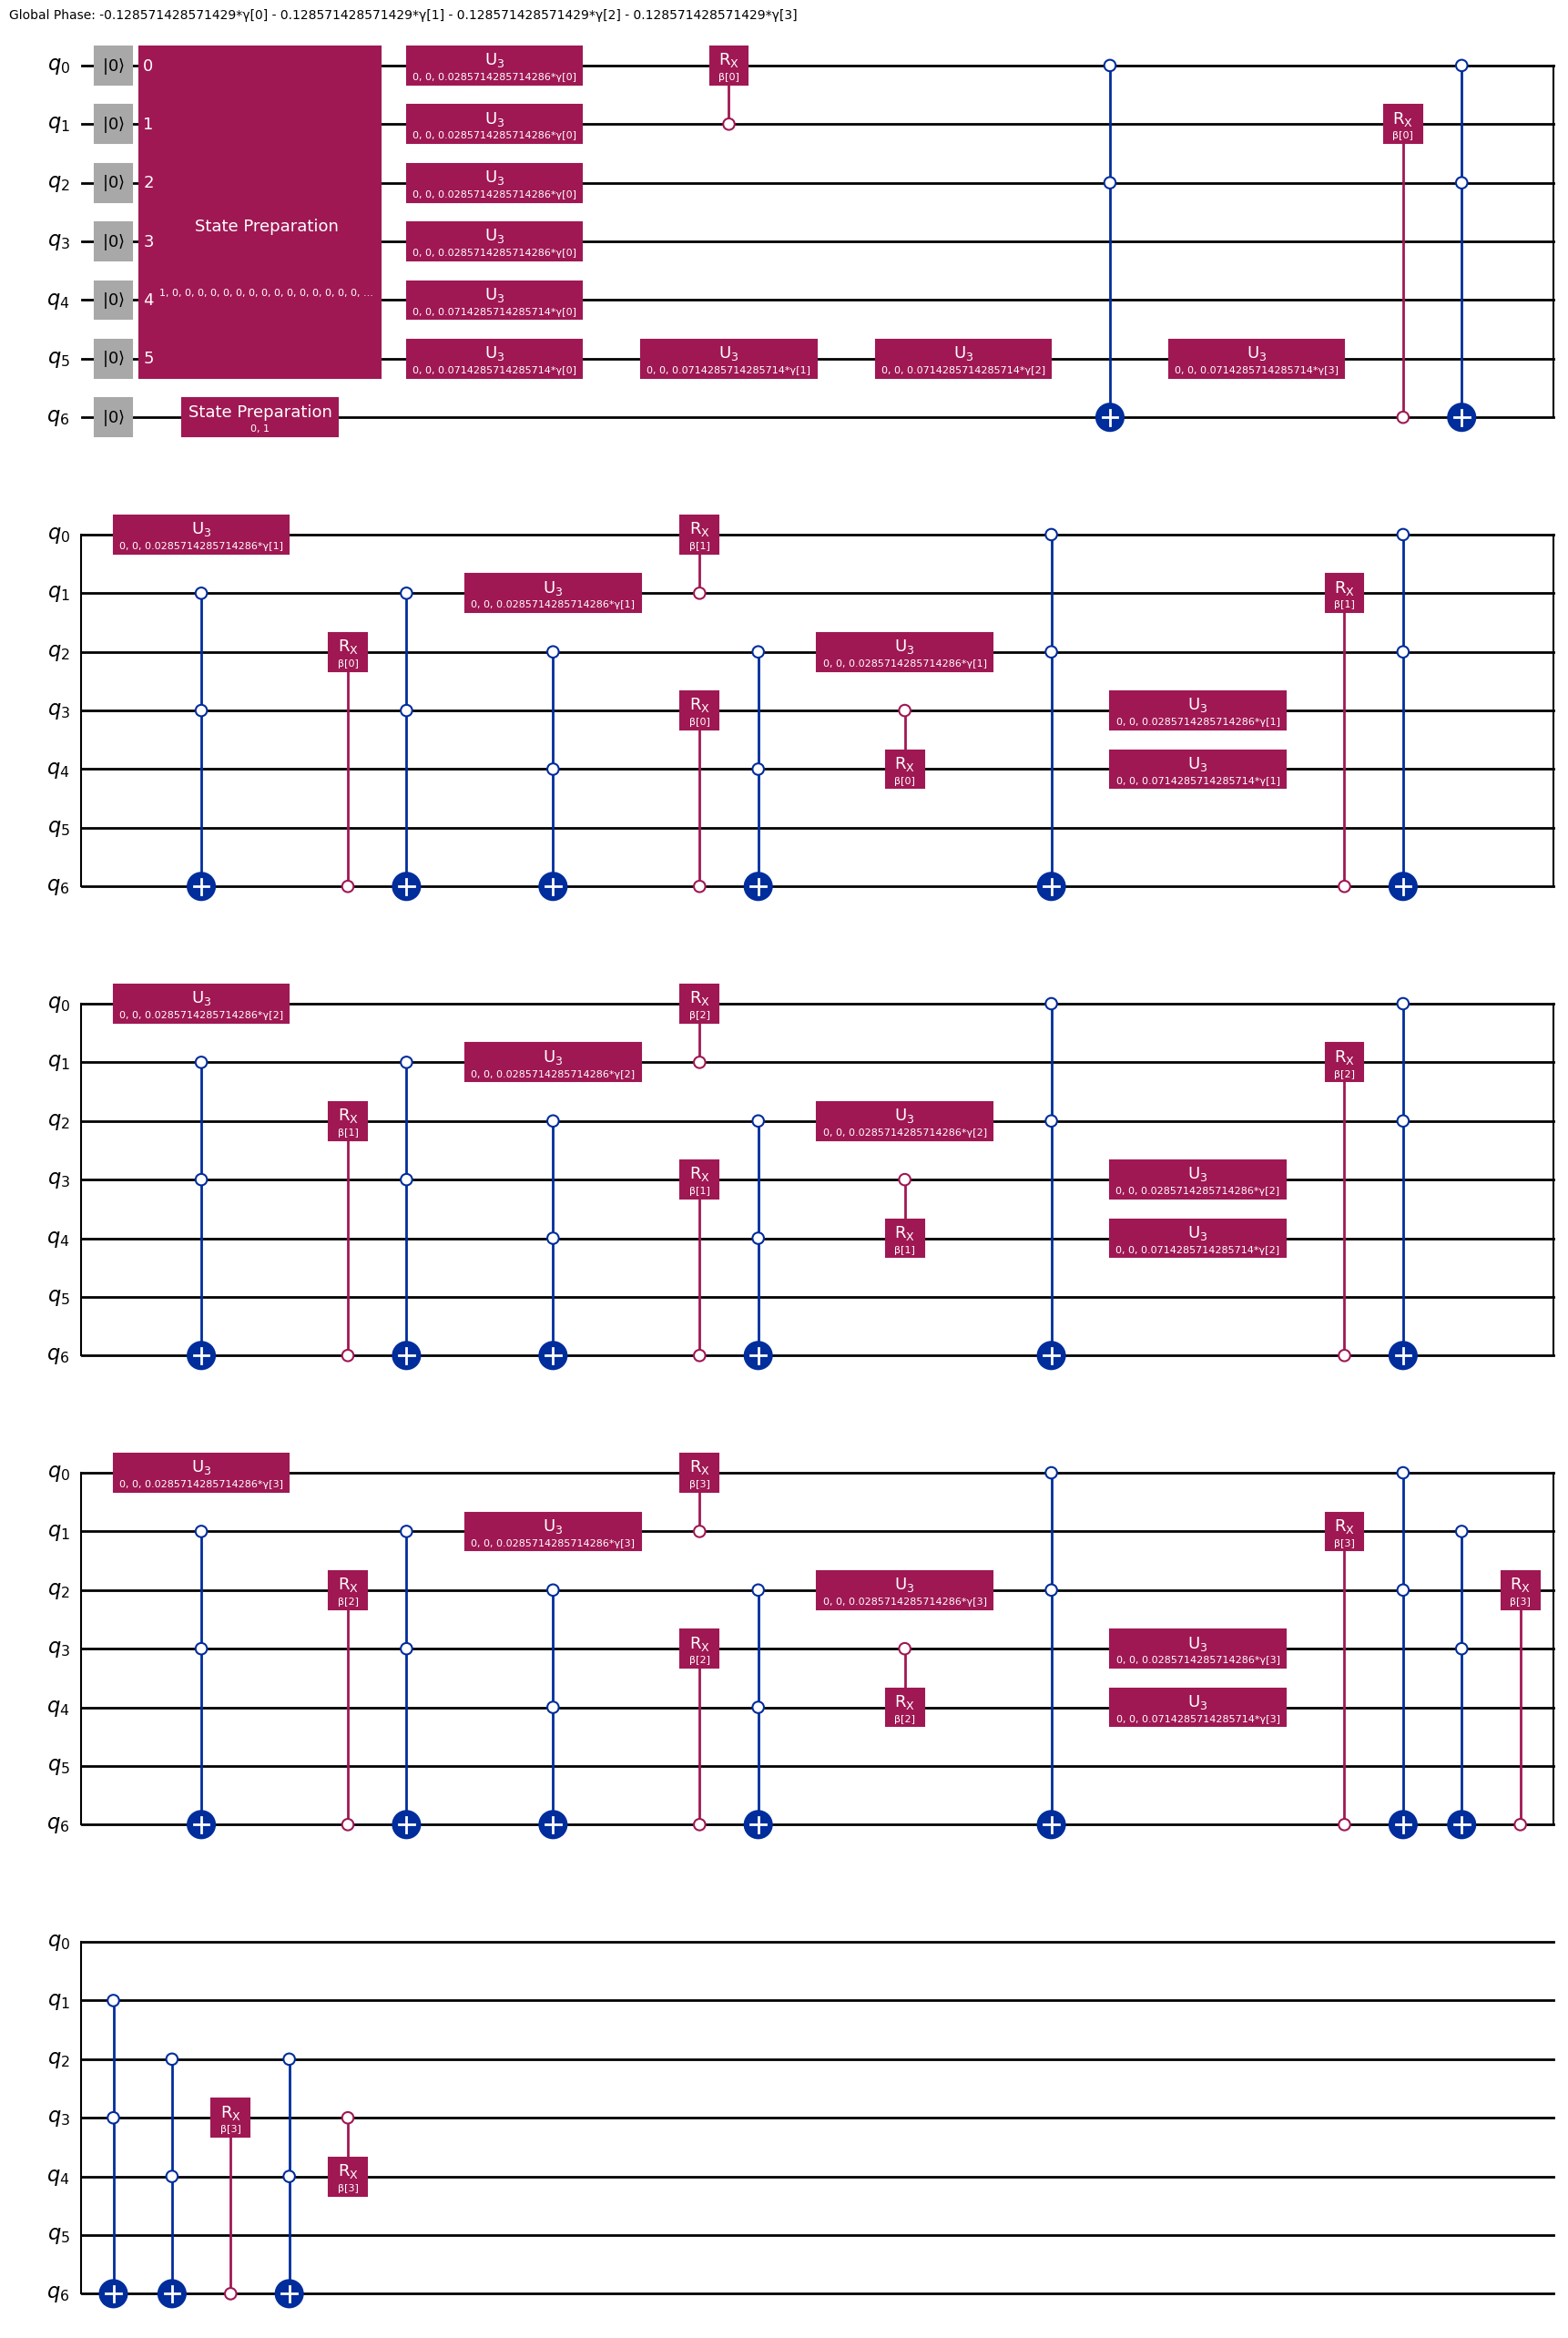

In [8]:
print(f"Instance #{instance}")
ansatz.decompose(reps=2).draw("mpl")

## Plot from a saved folder ...
### ... for each instance, the best attempt (with also mean and error displayed) or...
Plot the results of all chosen instances for which QAOA has been computed or plot results from a previous run.

The `find_files_containing_string` function will search for `.csv` and `.txt` files in the selected `path`. If provided, it will also search for files that contain a specific string of text.

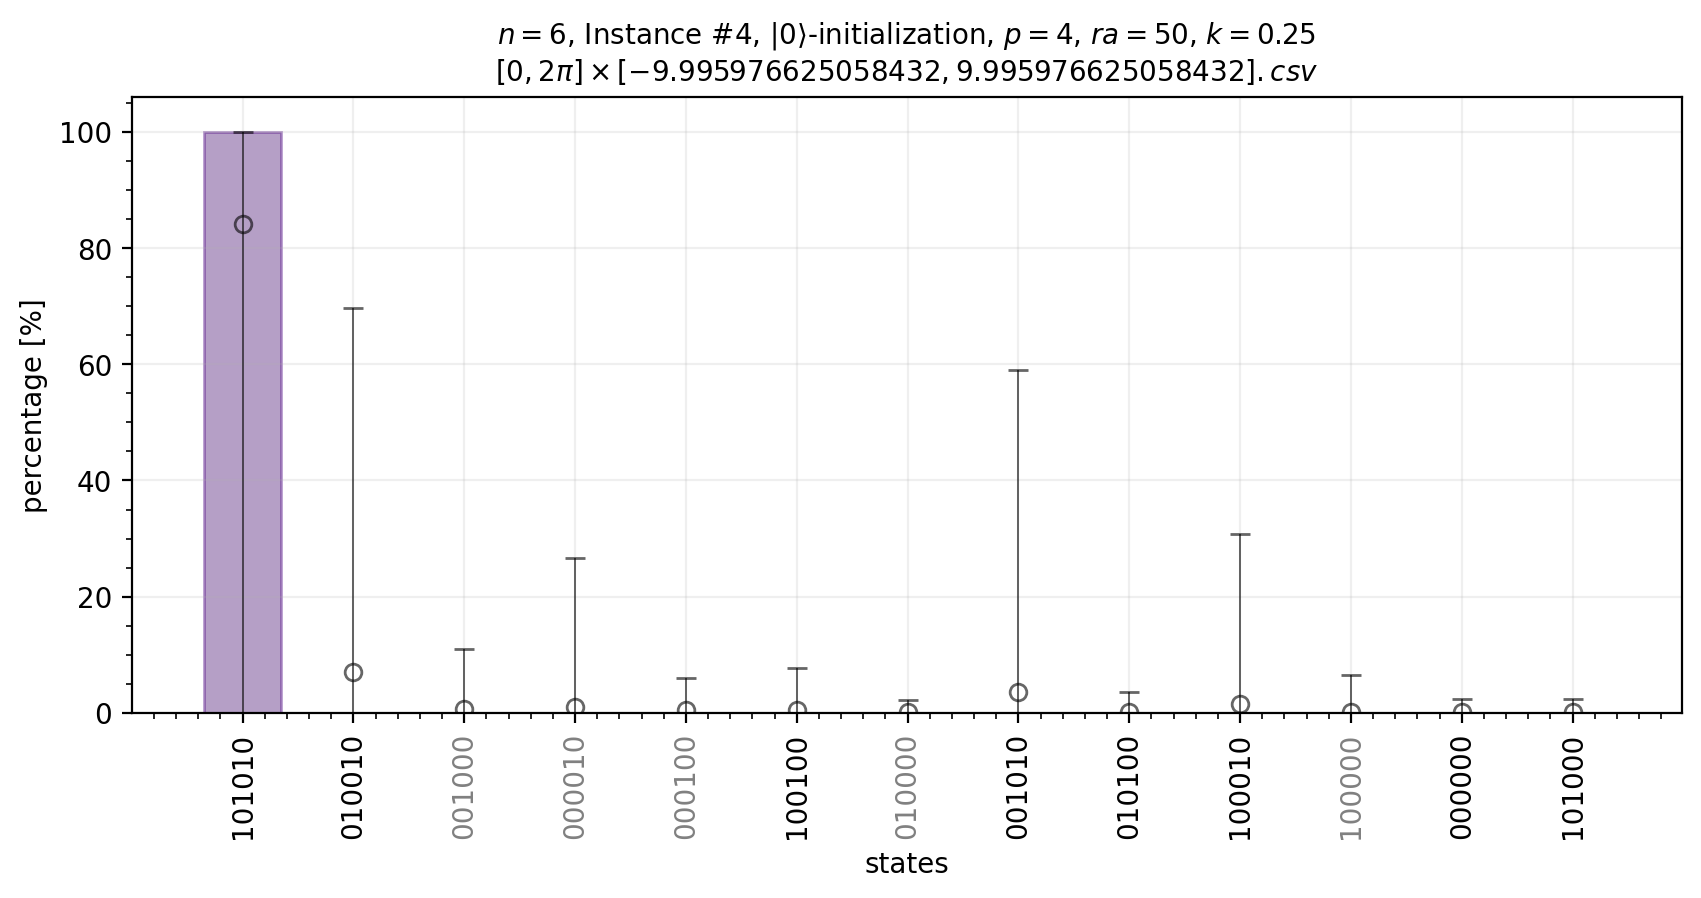

In [10]:
# Uncomment this line to plot data from an existing directory
# folder_path = "random_parameters_2025-01-30@09h03m50s"
# folder_path = "random_parameters_2025-06-06@17h36m57s"

# Find the files that contain every string in 'substrings'.
FILENAME_list, DATA_FILENAME_list = find_files_containing_string(path= f"./{folder_path}/")

# Get the number of files collected.
num_files = len(FILENAME_list)

if num_files>1:
    plot_list_of_files(FILENAME_list, DATA_FILENAME_list,
                       colorchosen="steelblue", alpha=0.6,
                       init_name="all1",
                       dont_show_in_title=["i", "k"],
                       dont_show_in_titles=["n", "p", "ra", "k", "init"],
                       figsize=(8,num_files+1),
                       dpi=200, N=9) # figsize=(10, 13), dpi=300, N=12 for latex figures
else:
    plot_file(FILENAME_list[0], DATA_FILENAME_list[0],
              colorchosen='indigo', alpha=0.4,
              dont_show_in_title = [],
              figsize=(10,4), dpi=200, N=10)

### ... for each instance, every single attempt

In [ ]:
# folder_path = "random_parameters_2025-01-30@09h03m50s"
plot_each_attempt_from_folder(folder_path)

In [6]:
print(info_dim6)


{1: {'exact_covers': ['011110', '101111'], 'mec': '011110', 'subsets': [{8, 11}, {8, 11, 4, 12}, {10, 3}, {9, 2, 5, 7}, {1, 6}, {4, 12}]}, 2: {'exact_covers': ['001101', '111011'], 'mec': '001101', 'subsets': [{1, 5}, {4, 6}, {10, 7}, {1, 2, 4, 5, 6, 12}, {2, 12}, {8, 9, 3, 11}]}, 3: {'exact_covers': ['100111', '111011'], 'mec': '100111', 'subsets': [{12, 6}, {8, 1, 10, 4}, {3, 7}, {1, 3, 4, 7, 8, 10}, {9, 5}, {2, 11}]}, 4: {'exact_covers': ['001110', '111101'], 'mec': '001110', 'subsets': [{8, 1}, {12, 5}, {10, 7}, {2, 3, 4, 6}, {1, 5, 8, 9, 11, 12}, {9, 11}]}, 5: {'exact_covers': ['110001', '011111'], 'mec': '110001', 'subsets': [{1, 3, 5, 7, 8, 10}, {11, 4}, {5, 7}, {8, 3}, {1, 10}, {9, 2, 12, 6}]}, 6: {'exact_covers': ['001111', '111101'], 'mec': '001111', 'subsets': [{2, 10}, {9, 11, 4, 5}, {3, 12}, {1, 6}, {2, 4, 5, 9, 10, 11}, {8, 7}]}, 7: {'exact_covers': ['101001', '011111'], 'mec': '101001', 'subsets': [{1, 2, 7, 10, 11, 12}, {10, 12}, {3, 4}, {1, 2}, {11, 7}, {8, 9, 5, 6}]},